In [1]:
import tensorflow as tf
import numpy as np
import pickle

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\input_layer_4_6_8_4.pickle','rb') as file:
    input_data = pickle.load(file)
print(input_data.shape)

x_train = input_data[:400000,:]
#x_valid = input_data[5765840:5771840,:]
x_test = input_data[400000:, :]
#(5775840, 24)

(405000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Min-Max\\output_layer_4_6_8_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
y_train = output_data[:400000,:]
#y_valid = output_data[5765840:5771840,:]
#y_test = output_data[5771840:,:]
y_test = output_data[400000:, :]
print(output_data.shape)

(405000, 12)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150,input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2,validation_data = (x_test, y_test))


Train on 400000 samples, validate on 5000 samples
Epoch 1/100
400000/400000 - 6s - loss: 0.2087 - accuracy: 0.9094 - val_loss: 0.1759 - val_accuracy: 0.9149
Epoch 2/100
400000/400000 - 5s - loss: 0.1442 - accuracy: 0.9297 - val_loss: 0.1216 - val_accuracy: 0.9421
Epoch 3/100
400000/400000 - 5s - loss: 0.1096 - accuracy: 0.9487 - val_loss: 0.1045 - val_accuracy: 0.9513
Epoch 4/100
400000/400000 - 5s - loss: 0.0969 - accuracy: 0.9544 - val_loss: 0.0966 - val_accuracy: 0.9535
Epoch 5/100
400000/400000 - 5s - loss: 0.0884 - accuracy: 0.9577 - val_loss: 0.0910 - val_accuracy: 0.9552
Epoch 6/100
400000/400000 - 5s - loss: 0.0815 - accuracy: 0.9603 - val_loss: 0.0810 - val_accuracy: 0.9600
Epoch 7/100
400000/400000 - 5s - loss: 0.0753 - accuracy: 0.9628 - val_loss: 0.0760 - val_accuracy: 0.9609
Epoch 8/100
400000/400000 - 5s - loss: 0.0699 - accuracy: 0.9649 - val_loss: 0.0735 - val_accuracy: 0.9619
Epoch 9/100
400000/400000 - 5s - loss: 0.0655 - accuracy: 0.9666 - val_loss: 0.0678 - val_accu

Epoch 77/100
400000/400000 - 5s - loss: 0.0403 - accuracy: 0.9764 - val_loss: 0.0462 - val_accuracy: 0.9724
Epoch 78/100
400000/400000 - 5s - loss: 0.0404 - accuracy: 0.9763 - val_loss: 0.0465 - val_accuracy: 0.9721
Epoch 79/100
400000/400000 - 5s - loss: 0.0402 - accuracy: 0.9765 - val_loss: 0.0462 - val_accuracy: 0.9722
Epoch 80/100
400000/400000 - 5s - loss: 0.0404 - accuracy: 0.9764 - val_loss: 0.0467 - val_accuracy: 0.9719
Epoch 81/100
400000/400000 - 5s - loss: 0.0403 - accuracy: 0.9765 - val_loss: 0.0465 - val_accuracy: 0.9721
Epoch 82/100
400000/400000 - 6s - loss: 0.0400 - accuracy: 0.9766 - val_loss: 0.0464 - val_accuracy: 0.9722
Epoch 83/100
400000/400000 - 6s - loss: 0.0402 - accuracy: 0.9766 - val_loss: 0.0471 - val_accuracy: 0.9714
Epoch 84/100
400000/400000 - 4s - loss: 0.0402 - accuracy: 0.9766 - val_loss: 0.0471 - val_accuracy: 0.9714
Epoch 85/100
400000/400000 - 5s - loss: 0.0401 - accuracy: 0.9766 - val_loss: 0.0466 - val_accuracy: 0.9722
Epoch 86/100
400000/400000 -

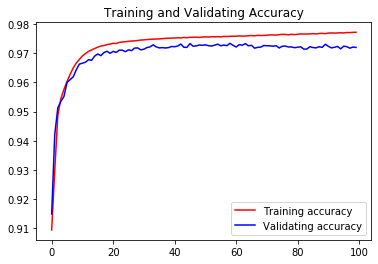

In [9]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
plt.legend()

In [8]:
model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [10]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Min_Max\\Min_Max_4_6_8_4_model.h5')